In [1]:
import pickle
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
#python
time_record_py = "../scripts/reconstruction_acc_time.pickle"
err_record_py = "../scripts/reconstruction_acc_error.pickle"
#matlab
time_rec_ml = "../scripts/reconstruct_meta.mat"

In [12]:
time_py_biased = pickle.load(open(time_record_py, "rb" ))
err_py = pickle.load(open(err_record_py,"rb"))

In [14]:
#first recored time is the forward pass time
time_py = np.array(time_py_biased[1:])+time_py_biased[0]/(len(time_py_biased)-1)

In [21]:
np.mean(time_py)

0.7318244802951813

In [4]:
time_ml = scipy.io.loadmat(time_rec_ml)

In [5]:
time_ml

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Mar 23 17:13:11 2022',
 '__version__': '1.0',
 '__globals__': [],
 'T_elapsed': array([[7.05836941, 6.14066433, 5.78170572, 5.82488523, 5.84281104,
         5.7050916 , 5.75283978, 5.69138882, 5.67765047, 5.71293002,
         5.76609858, 5.70000115, 5.92676664, 6.32562621, 5.95290881,
         5.68325734, 6.63508217, 6.7277872 , 7.15944032, 7.94893553]])}

In [16]:
len(time_py),time_ml['T_elapsed'].shape

(200, (1, 20))

[4.324708557783054e-05, 0.38262988424022876] [0.7318244802951813, 6.150712018449999]


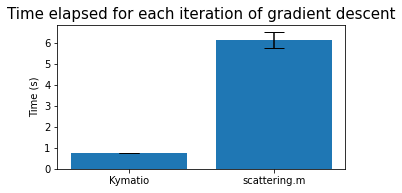

In [30]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_axes([0,0,1,1])
langs = ['Kymatio', 'scattering.m']
time_lapsed = [np.mean(time_py),np.mean(time_ml['T_elapsed'])]
err_lapsed = [np.var(time_py),np.var(time_ml['T_elapsed'])]
print(err_lapsed,time_lapsed)
ax.bar(langs,time_lapsed,yerr=err_lapsed, capsize=10)
ax.set_ylabel("Time (s)",fontsize=10)
ax.set_title("Time elapsed for each iteration of gradient descent",fontsize=15)
plt.show()